Data from HRSC and MOLA Blended Digital Elevation Model at 200m v2. Astrogeology PDS Annex, U.S. Geological Survey. I significantly downsized the original resoluation of 200m to 10% of the original size using GDAL in the command line so I had enough working memory to plot and to save some processing time for this exercise.

In [21]:
import osgeo
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import earthpy as et
import earthpy.spatial as es

In [2]:
mars_file = rasterio.open('marsDEM.tif')
mars = mars_file.read()


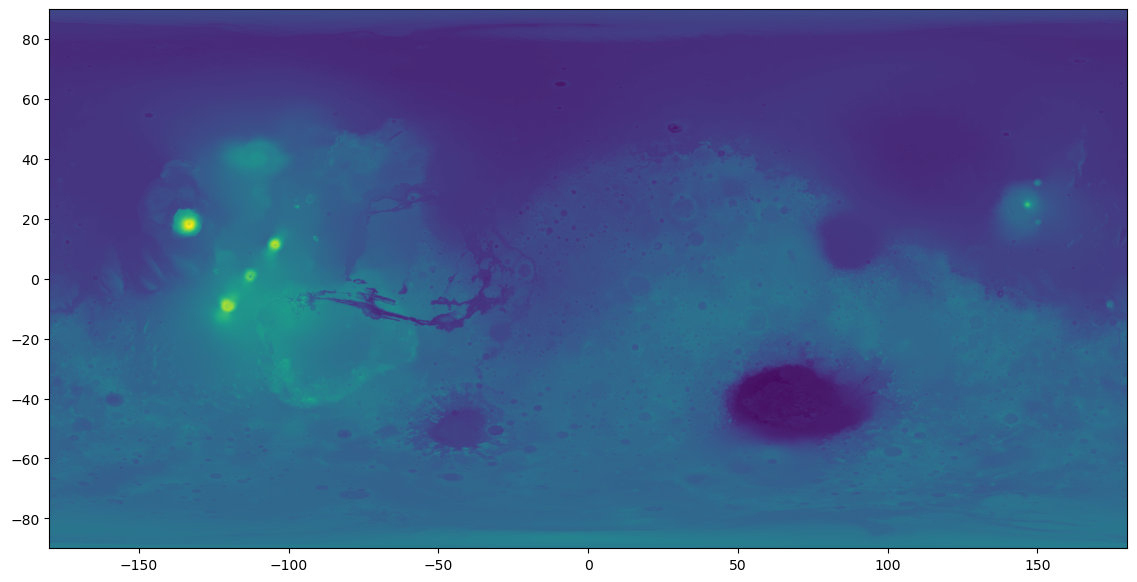

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

rasterio.plot.show(mars_file, cmap='viridis')
ax.axis('off')

plt.show()

In [4]:
custom_cmap = LinearSegmentedColormap.from_list('mars', ['#162252','#104E8B','#00B2EE','#00FF00',
                                                          '#FFFF00','#FFA500','#FF0000','#8b0000',
                                                          '#964B00','#808080','#FFFFFF'], N=2221)
bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, custom_cmap.N)

Add text with plot.text()

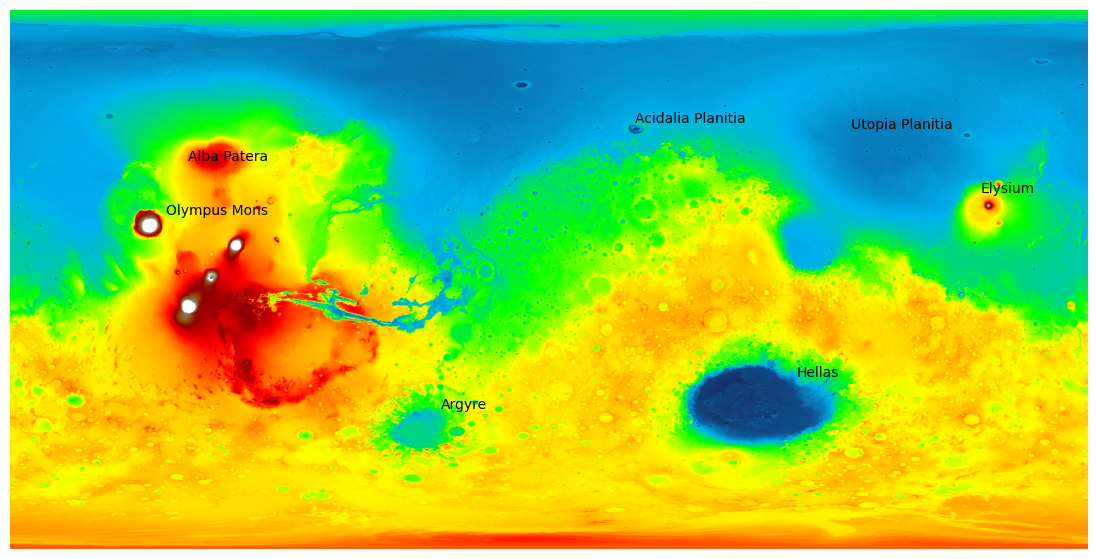

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

text_kwargs = dict(transform=ax.transAxes)

ax.text(0.145, 0.62, 'Olympus Mons', **text_kwargs)
ax.text(0.165, 0.72, 'Alba Patera', **text_kwargs)
ax.text(0.58, 0.79, 'Acidalia Planitia', **text_kwargs)
ax.text(0.78, 0.78, 'Utopia Planitia', **text_kwargs)
ax.text(0.9, 0.66, 'Elysium', **text_kwargs)
ax.text(0.73, 0.32, 'Hellas', **text_kwargs)
ax.text(0.4, 0.26, 'Argyre', **text_kwargs)
ax.axis('off')
show(mars_file, cmap=custom_cmap, norm=norm)

plt.show()

Now to create a custom color map to simulate earth terrain and bathymetry colors.

In [41]:
# Create color map for the ocean colors (less than the average elevation)
colors_undersea = plt.cm.ocean(np.linspace(0.2, .9, 821))
undersea_map = LinearSegmentedColormap.from_list('undersea_map', colors_undersea, N=821)

# Create color map for the land colors (greater than the average elevation)
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 1400))
land_map = LinearSegmentedColormap.from_list('land_map', colors_land, N=1400)

# Combine both into a single list
colors = np.vstack((colors_undersea, colors_land))
terrain_map = LinearSegmentedColormap.from_list('cut_terrain', colors, N=2221)

bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, terrain_map.N)

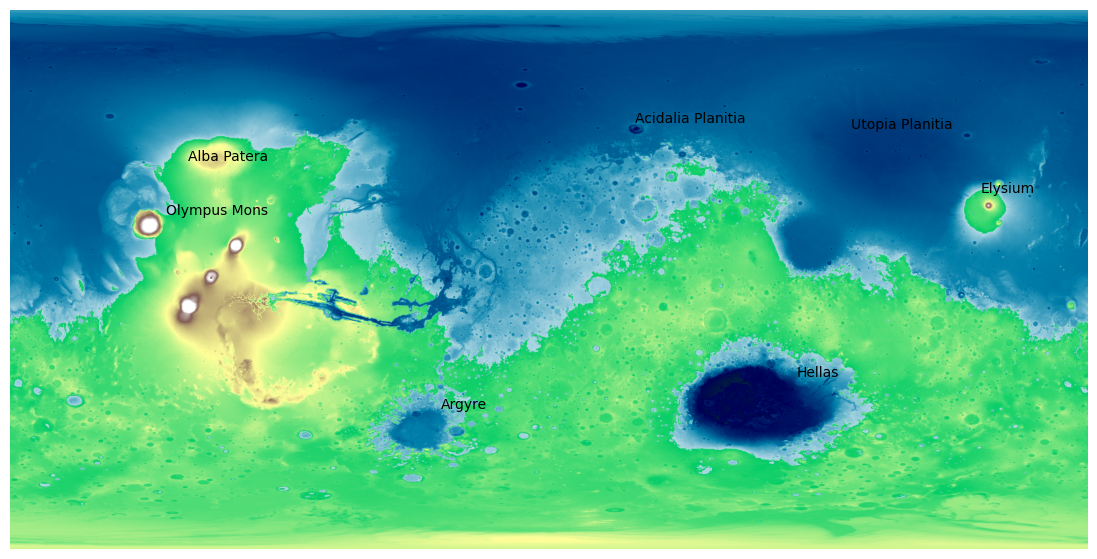

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

text_kwargs = dict(transform=ax.transAxes)

ax.text(0.145, 0.62, 'Olympus Mons', **text_kwargs)
ax.text(0.165, 0.72, 'Alba Patera', **text_kwargs)
ax.text(0.58, 0.79, 'Acidalia Planitia', **text_kwargs)
ax.text(0.78, 0.78, 'Utopia Planitia', **text_kwargs)
ax.text(0.9, 0.66, 'Elysium', **text_kwargs)
ax.text(0.73, 0.32, 'Hellas', **text_kwargs)
ax.text(0.4, 0.26, 'Argyre', **text_kwargs)
ax.axis('off')
show(mars_file, cmap=terrain_map, norm=norm)

plt.show()

Adding hillshade to the map:

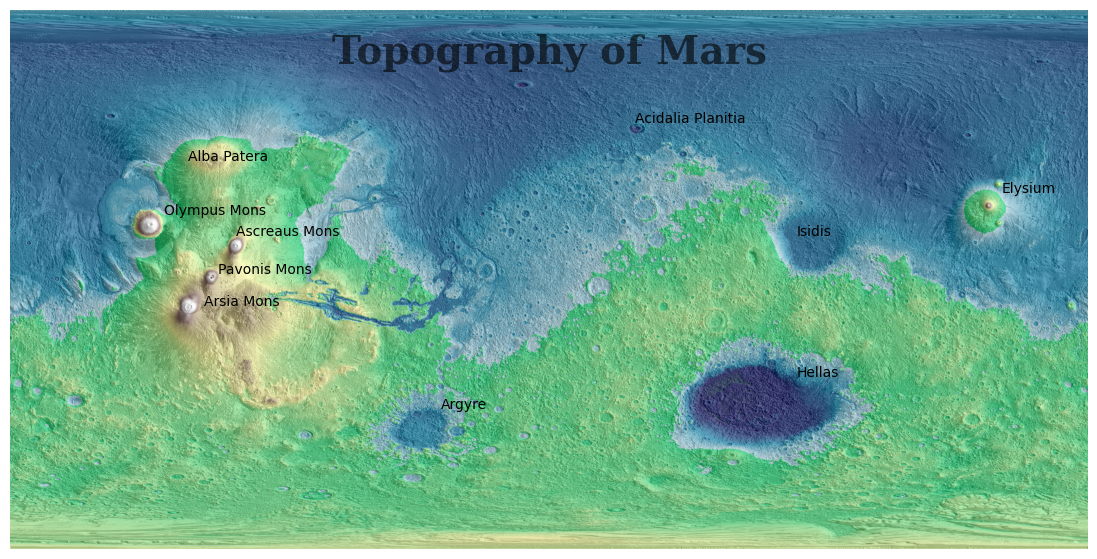

In [52]:
hillshade = es.hillshade(mars[0], azimuth=250, altitude=1)
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

text_kwargs = dict(transform=ax.transAxes)

ax.text(0.5, 0.9, 'Topography of Mars', horizontalalignment="center", 
        fontweight='bold', fontsize=28, family='serif', alpha=0.6, **text_kwargs)

ax.text(0.143, 0.62, 'Olympus Mons', **text_kwargs)
ax.text(0.21, 0.58, 'Ascreaus Mons', **text_kwargs)
ax.text(0.193, 0.51, 'Pavonis Mons', **text_kwargs)
ax.text(0.18, 0.45, 'Arsia Mons', **text_kwargs)
ax.text(0.165, 0.72, 'Alba Patera', **text_kwargs)
ax.text(0.58, 0.79, 'Acidalia Planitia', **text_kwargs)
ax.text(0.92, 0.66, 'Elysium', **text_kwargs)
ax.text(0.73, 0.32, 'Hellas', **text_kwargs)
ax.text(0.4, 0.26, 'Argyre', **text_kwargs)
ax.text(0.73, 0.58, 'Isidis', **text_kwargs)


rasterio.plot.show(mars_file, cmap=terrain_map, norm=norm, ax=ax)
rasterio.plot.show(hillshade, transform=mars_file.transform, cmap="Greys", alpha=0.4, ax=ax)

ax.axis('off')
plt.show()


In [56]:
fig.savefig('marstopo.png', dpi=190, bbox_inches='tight', pad_inches=0)